In [42]:
# Import the necessary python libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"
from tabulate import tabulate

# Load the stocks dataset
stocks_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stocks.csv")


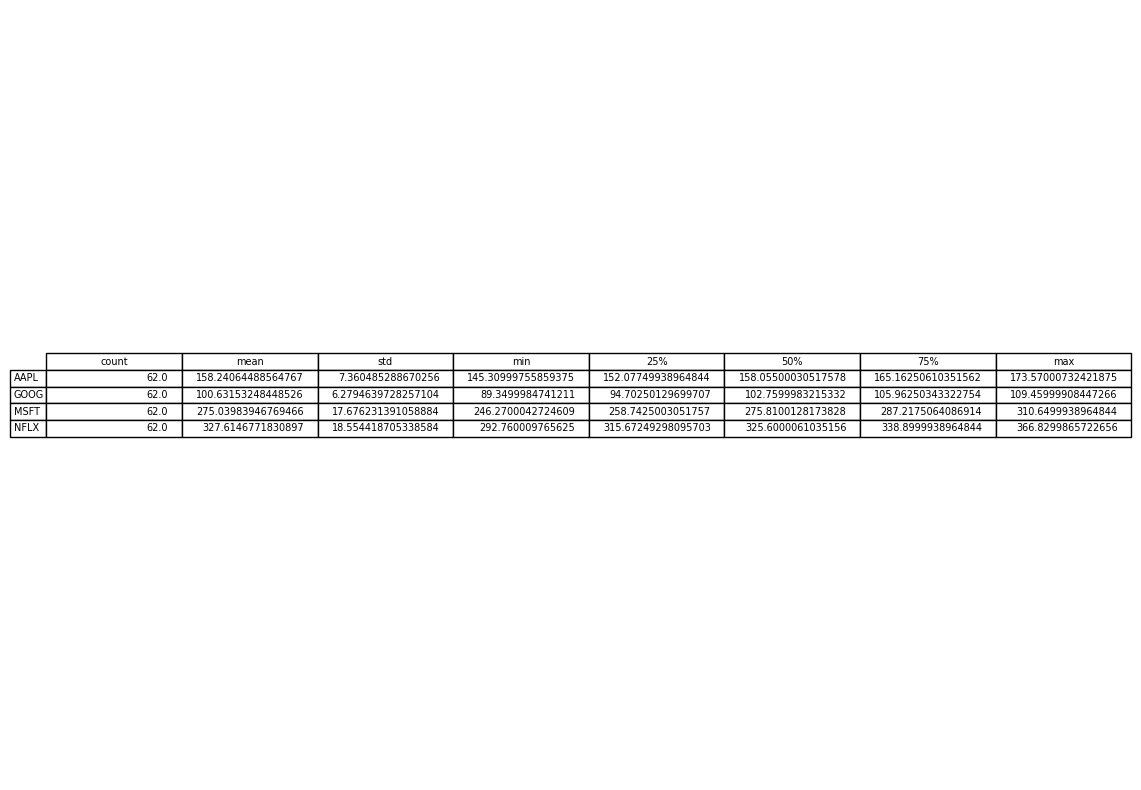

In [23]:
# Descriptive statistical analysis for each stock
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()

fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=descriptive_stats.values,
                colLabels=descriptive_stats.columns,
                rowLabels=descriptive_stats.index,
                loc='center')

plt.show()

In [26]:

# Time Series Analysis to examine trends and patterns over time
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Ticker', values='Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)
fig.show()


In [27]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')
fig.show()

In [38]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

fig.show()

In [39]:
# Comparative Analysis
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')
fig.show()

In [40]:
# Risk vs Return Analysis
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

fig.show()